In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Step 1: Load the Assignment#1_Part1_Motor_Insurance_Fraud.csv

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347_Machine-Learning-in-Healthcare/Week_2/Assignment#1_Part1_Motor_Insurance_Fraud.csv')

Step 2:  Explore the dataset 

•	Display the dataframe

In [3]:
df

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,CI,0,NaN,1,Soft Tissue,No,2118,0,0,0.0,0.0,0,1
496,497,CI,29280,Married,4,Broken Limb,Yes,3199,0,0,NaN,0.0,0,1
497,498,CI,0,NaN,1,Broken Limb,Yes,32469,0,0,0.0,0.0,16763,0
498,499,CI,46683,Married,1,Broken Limb,No,179448,0,0,0.0,0.0,179448,0


•	What are all the columns? What are their data types?

In [4]:
df.columns

Index(['ID', 'Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [5]:
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

•	Pick any column and show it.

In [6]:
df.ID

0        1
1        2
2        3
3        4
4        5
      ... 
495    496
496    497
497    498
498    499
499    500
Name: ID, Length: 500, dtype: int64

•	Create new column “revenue” which is sum of “Num claims” and “Claim Amount Received”. Check to see if new column is there or not.

In [7]:
df['revenue'] = df['Num Claims'] + df['Claim Amount Received']
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag,revenue
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1,2
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0,15029
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0,572
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0,270200
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1,0


•	Select any row and display that

In [8]:
df.iloc[0]

ID                                   1
Insurance Type                      CI
Income of Policy Holder              0
Marital Status                     NaN
Num Claimants                        2
Injury Type                Soft Tissue
Overnight Hospital Stay             No
Claim Amount                      1625
Total Claimed                     3250
Num Claims                           2
Num Soft Tissue                      2
% Soft Tissue                        1
Claim Amount Received                0
Fraud Flag                           1
revenue                              2
Name: 0, dtype: object

Step 3: Identify missing attribute field(s). Which have missing values and how many? Propose a way to resolve these missing values for those attributes.

In [9]:
df.isna().sum()

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
revenue                      0
dtype: int64

For the Num Soft Tissue, because it only has 10 missing values, I think I can replace those 10 cells with the median of Num Soft Tissue. However, for the Marital Status, it's almost 70% missing value. I think I can just drop the entire column.

Step4: Consider the attribute “Insurance Type”. Do you find it odd? How would you remove that attribute? 

Ans: Yes, all insurance types are the same.

In [10]:
df['Insurance Type '].unique()

array(['CI'], dtype=object)

In [11]:
df.drop(['Insurance Type '], axis =1,inplace=True)

Step 5: Explore how the attributes vary or relate to each other. Calculate and visualize correlations using correlation matrix

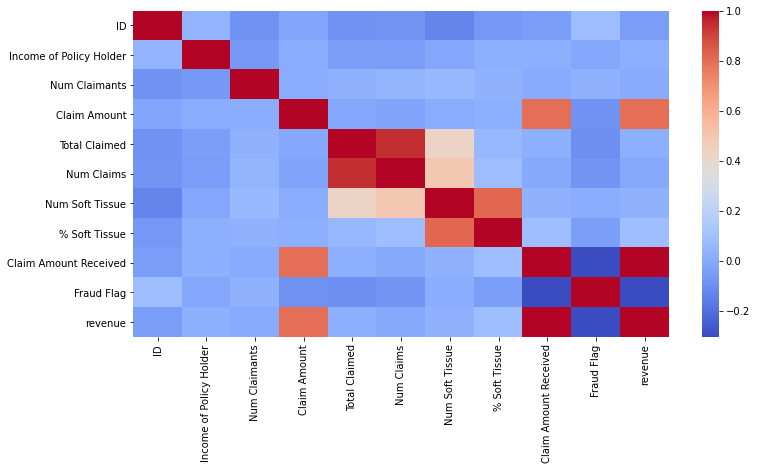

In [12]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

Step6: Try to keep some and eliminate some attributes based on correlation matrix.

In [13]:
df.drop(columns= ['Claim Amount','% Soft Tissue'],inplace=True)

In [14]:
df.head()

,ID,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Total Claimed,Num Claims,Num Soft Tissue,Claim Amount Received,Fraud Flag,revenue
0,1,0,NaN,2,Soft Tissue,No,3250,2,2.0,0,1,2
1,2,0,NaN,2,Back,Yes,60112,1,0.0,15028,0,15029
2,3,54613,Married,1,Broken Limb,No,0,0,0.0,572,0,572
3,4,0,NaN,3,Serious,Yes,0,0,0.0,270200,0,270200
4,5,0,NaN,4,Soft Tissue,No,0,0,0.0,0,1,0


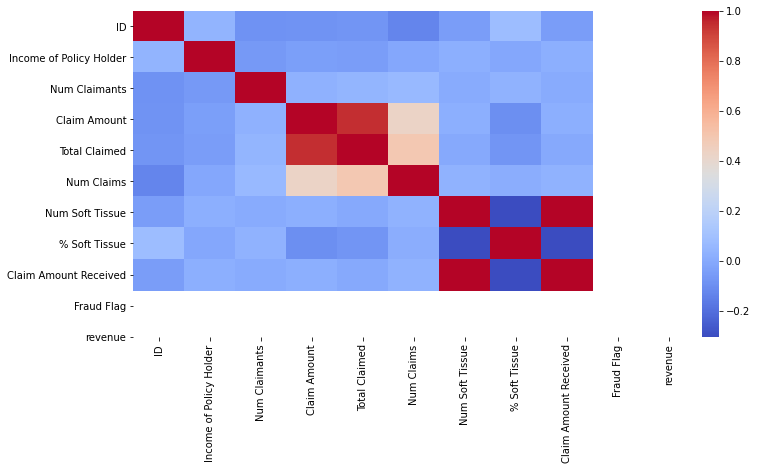

In [15]:
new_corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(new_corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

Step 7: Save your notebook and share it on canvas. Using text comments,  write briefly your observations and inferences.